#### Importar bibliotecas

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

#### Importar dataset Iris

In [2]:
from sklearn.datasets import load_iris

In [3]:
X, y = load_iris(return_X_y=True, as_frame=True)
X = X.loc[y.isin([0,1]), ['petal length (cm)', 'petal width (cm)']]
y = y.loc[y.isin([0,1])]

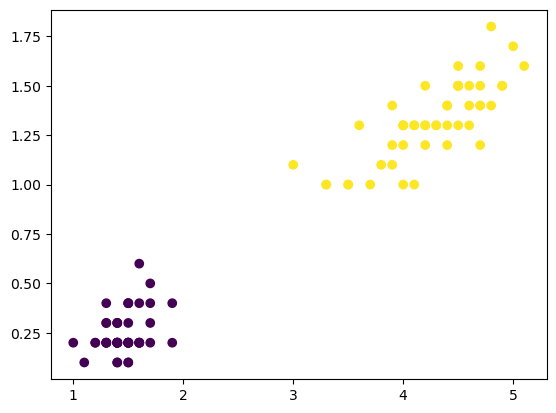

In [4]:
fig, ax = plt.subplots()

ax.scatter(X.iloc[:,0], X.iloc[:,1], c=y)

plt.show()

#### Treino e teste

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Perceptron

In [7]:
from sklearn.linear_model import Perceptron

In [8]:
clf = Perceptron(tol=1e-3, random_state=0, eta0=0.1).fit(X_train, y_train)

In [9]:
y_pred = clf.predict(X_test)

#### Matrix de confusão

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 0, 14]])

#### Gráfico da linha

In [12]:
w1, w2, w0 = clf.coef_[0][0], clf.coef_[0][1], clf.intercept_[0]

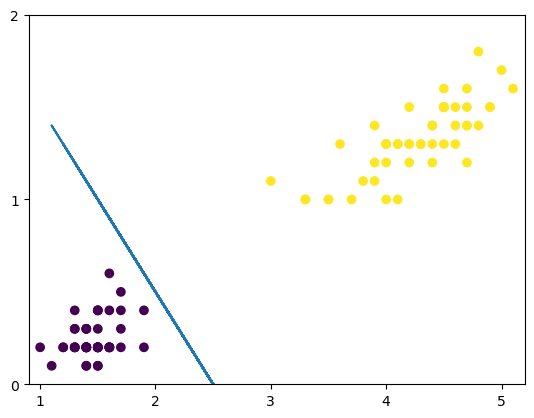

In [13]:
fig, ax = plt.subplots()

ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train)
ax.plot(X_train.iloc[:,0], (-w1 * X_train.iloc[:,0] -w0) / w2)
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test)

ax.set(
    xlim=(0.9, 5.2), xticks=(range(1,6)),
    ylim=(0, 2), yticks=list(range(0,3))
)

plt.show()

#### Usando classes 1 e 2

In [14]:
X, y = load_iris(return_X_y=True, as_frame=True)
X = X.loc[y.isin([1,2]), ['petal length (cm)', 'petal width (cm)']]
y = y.loc[y.isin([1,2])]

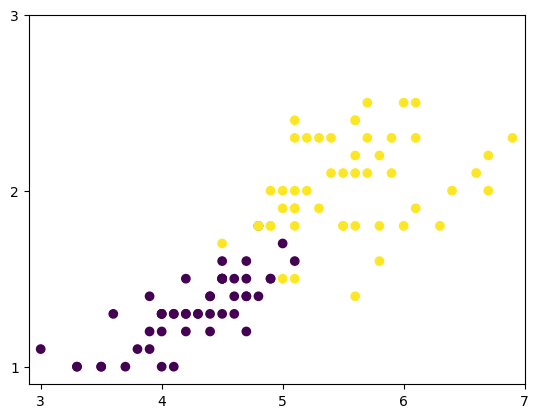

In [15]:
fig, ax = plt.subplots()

ax.scatter(X.iloc[:,0], X.iloc[:,1], c=y)

ax.set(
    xlim=(2.9, 7), xticks=(range(3, 8)),
    ylim=(0.9, 3), yticks=list(range(1,4))
)

plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
clf = Perceptron(tol=1e-3, random_state=0, eta0=0.1).fit(X_train, y_train)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 2, 12]])

In [20]:
w1, w2, w0 = clf.coef_[0][0], clf.coef_[0][1], clf.intercept_[0]

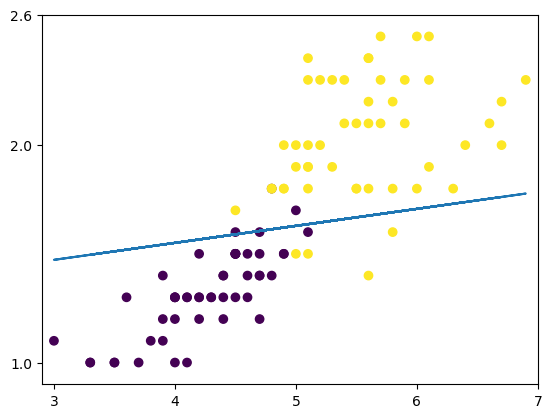

In [21]:
fig, ax = plt.subplots()

ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train)
ax.plot(X_train.iloc[:,0], (-w1 * X_train.iloc[:,0] -w0) / w2)
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test)

ax.set(
    xlim=(2.9, 7), xticks=(range(3,8)),
    ylim=(0.9, 2.6), yticks=[1, 2, 2.6]
)

plt.show()

#### O Problema do OR e XOR

In [22]:
data_or = pd.DataFrame({
    'x1': [0,0,1,1],
    'x2': [0,1,0,1],
    'y': [0,1,1,1]
})

In [23]:
data_xor = pd.DataFrame({
    'x1': [0,0,1,1],
    'x2': [0,1,0,1],
    'y': [0,1,1,0]
})

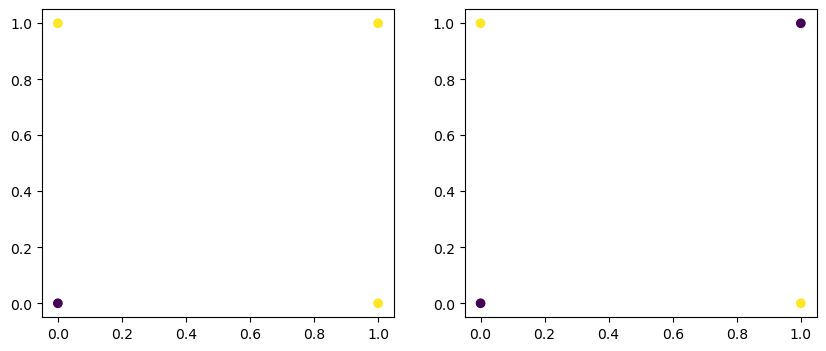

In [24]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

ax[0].scatter(data_or['x1'], data_or['x2'], c=data_or['y'])
ax[1].scatter(data_xor['x1'], data_xor['x2'], c=data_xor['y'])

plt.show()
# XOR não é linearmente separável

#### Perceptron com OR

In [25]:
X = data_or[['x1', 'x2']]
y = data_or['y']

In [26]:
clf = Perceptron(tol=1e-3, random_state=0, eta0=0.1).fit(X, y)

In [27]:
y_pred = clf.predict(X)

In [28]:
y_pred

array([0, 1, 1, 1])

In [29]:
confusion_matrix(data_or['y'], y_pred)

array([[1, 0],
       [0, 3]])

In [30]:
w1 = clf.coef_[0][0]
w2 = clf.coef_[0][1]
w0 = clf.intercept_[0]

In [31]:
x_perc = np.linspace(-0.1,1,100)
y_perc = (-w1 * x_perc -w0) / 2

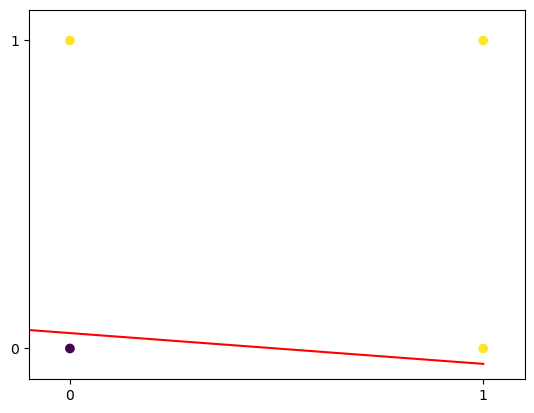

In [32]:
fig, ax = plt.subplots()

ax.scatter(data_or['x1'], data_or['x2'], c=data_or['y'])
ax.plot(x_perc,  y_perc, 'r')

ax.set(
    xlim=(-0.1, 1.1), xticks=[0,1],
    ylim=(-0.1, 1.1), yticks=[0,1]
)

plt.show()

#### Perceptron com XOR

In [33]:
X = data_xor[['x1', 'x2']]
y = data_xor['y']

In [34]:
clf = Perceptron(tol=1e-3, random_state=0, eta0=0.1).fit(X, y)

In [35]:
y_pred = clf.predict(X)

In [36]:
y_pred

array([0, 0, 0, 0])

In [37]:
confusion_matrix(data_xor['y'], y_pred)

array([[2, 0],
       [2, 0]])

In [38]:
w1 = clf.coef_[0][0]
w2 = clf.coef_[0][1]
w0 = clf.intercept_[0]

In [39]:
x_perc = np.linspace(-0.1,1,100)
y_perc = (-w1 * x_perc -w0) / 2

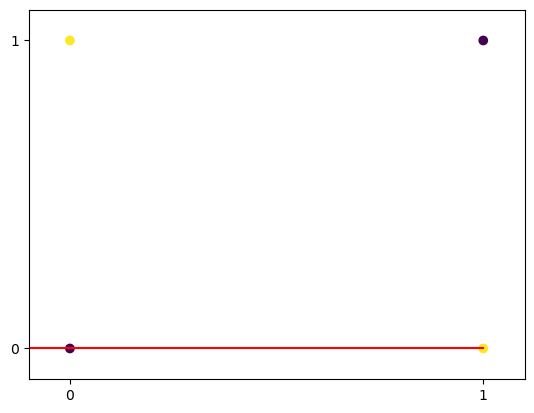

In [40]:
fig, ax = plt.subplots()

ax.scatter(data_xor['x1'], data_xor['x2'], c=data_xor['y'])
ax.plot(x_perc,  y_perc, 'r')

ax.set(
    xlim=(-0.1, 1.1), xticks=[0,1],
    ylim=(-0.1, 1.1), yticks=[0,1]
)

plt.show()